In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('aug_train.csv')
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [4]:
df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

<AxesSubplot:>

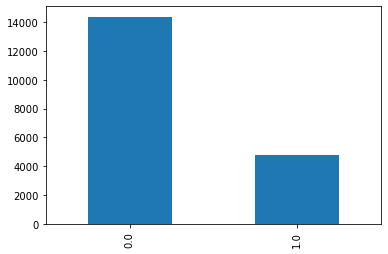

In [5]:
CountTarget = pd.value_counts(df['target'].values, sort=True)
CountTarget.plot.bar()

In [6]:
round((df.target.value_counts() / len(df)) * 100 , 2)

0.0    75.07
1.0    24.93
Name: target, dtype: float64

In [7]:
df.nunique()

enrollee_id               19158
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

<AxesSubplot:>

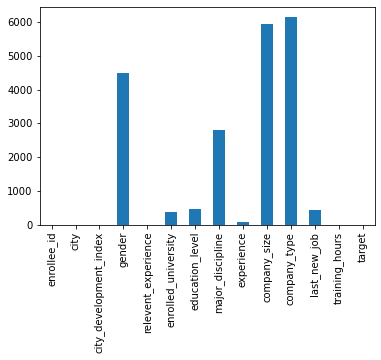

In [8]:
df.isnull().sum().plot(kind='bar')

In [9]:
df.corr()

,enrollee_id,city_development_index,training_hours,target
enrollee_id,1.000000,-0.040455,0.000998,0.049475
city_development_index,-0.040455,1.000000,0.001920,-0.341665
training_hours,0.000998,0.001920,1.000000,-0.021577
target,0.049475,-0.341665,-0.021577,1.000000


# Data Cleaning

### experience

In [11]:
# df.experience.value_counts()

In [12]:
experience_values = { '>20' : '21', '<1' : '0'}

In [13]:
df.experience = df.experience.replace(experience_values)

In [14]:
# df.experience.value_counts()

In [15]:
df['experience'] = pd.to_numeric(df['experience'])

In [16]:
# # Convert experience to groups of experience ranges
# bins_experience=[-1,4,8,12,16,20,200] #4 is in bin 1
# labels_experience = [1,2,3,4,5,6]
# df['experience'] = pd.cut(df['experience'], bins=bins_experience, labels=labels_experience) 
# # df['experience'] = pd.cut(df['experience'], bins=bins_experience, labels=labels_experience)

In [17]:
df.experience.value_counts()

21.0    3286
5.0     1430
4.0     1403
3.0     1354
6.0     1216
2.0     1127
7.0     1028
10.0     985
9.0      980
8.0      802
15.0     686
11.0     664
14.0     586
1.0      549
0.0      522
16.0     508
12.0     494
13.0     399
17.0     342
19.0     304
18.0     280
20.0     148
Name: experience, dtype: int64

### last new job

In [19]:
last_new_job_values = {'>4' : '4+'}

In [20]:
df.last_new_job = df.last_new_job.replace(last_new_job_values)

In [21]:
df.last_new_job.value_counts()

1        8040
4+       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

### company size

In [22]:
df.company_size.value_counts()

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [23]:
company_size_values = { '10/49' : '10-49', '<10' : '0-10'}

In [24]:
df.company_size = df.company_size.replace(company_size_values)

In [25]:
df.company_size.value_counts()

50-99        3083
100-500      2571
10000+       2019
10-49        1471
1000-4999    1328
0-10         1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [26]:
# df = df.fillna(df.mode())

In [27]:
# df = df.fillna(df.mode().iloc[0])

## Split into train, val, test

In [31]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [32]:
y_train = df_train.target.values
y_val = df_val.target.values
y_test = df_test.target.values

del df_train['target']
del df_val['target']
del df_test['target']
del df_train['enrollee_id']
del df_val['enrollee_id']
del df_test['enrollee_id']

## StandardScalar

In [33]:
# # standar_scaler = StandardScaler()
# ct = ColumnTransformer([
#         ('training_hours_scaler', StandardScaler(), ['training_hours', 'experience'])
#     ], remainder='passthrough')


# df_train_scalar = ct.fit_transform(df_train)
# df_val_scalar = ct.transform(df_val)

## Imputer 

In [34]:
from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='most_frequent')
imputer = SimpleImputer(strategy='constant')
df_train_impute = imputer.fit_transform(df_train)

In [35]:
df_val_impute = imputer.transform(df_val)

In [36]:
df_train = pd.DataFrame(df_train_impute, columns = df_train.columns)
# df_train

In [37]:
df_train.shape

(11494, 12)

In [38]:
df_val = pd.DataFrame(df_val_impute, columns = df_train.columns)
# df_val

## DictVectorizer

In [39]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

## Decision Tree

In [40]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.6377513847129428

In [42]:
y_pred = dt.predict_proba(X_val)[:, 1]
y_real = y_pred >= 0.3
f1_score(y_val, y_real)

0.4573762123532415

In [43]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

0.9999975533657437

### Decision Tree max_depth=3

In [44]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [45]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.7830889085050992
val: 0.7789381750057097


In [47]:
y_pred = dt.predict_proba(X_val)[:, 1]
for i in np.arange(0.0, 1.01, 0.1):
    y_threshold = y_pred >= i
    f1 = f1_score(y_val, y_threshold)
    roc = roc_auc_score(y_val, y_pred)
    print("i : %.3f, f1 : %.4f , roc : %.3f" % (i, f1, roc))

i : 0.000, f1 : 0.4017 , roc : 0.779
i : 0.100, f1 : 0.5455 , roc : 0.779
i : 0.200, f1 : 0.5759 , roc : 0.779
i : 0.300, f1 : 0.6080 , roc : 0.779
i : 0.400, f1 : 0.6080 , roc : 0.779
i : 0.500, f1 : 0.4787 , roc : 0.779
i : 0.600, f1 : 0.0000 , roc : 0.779
i : 0.700, f1 : 0.0000 , roc : 0.779
i : 0.800, f1 : 0.0000 , roc : 0.779
i : 0.900, f1 : 0.0000 , roc : 0.779
i : 1.000, f1 : 0.0000 , roc : 0.779


#### from the code above, We pick threshold 0.3

### Tuning Parameter Decision Tree

In [48]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    y_pred = dt.predict_proba(X_val)[:, 1] >= 0.3
    f1 = f1_score(y_val, y_pred)
    
    print('%4s -> %.3f -> %.4f' % (depth, auc, f1))

   1 -> 0.660 -> 0.4894
   2 -> 0.760 -> 0.5759
   3 -> 0.779 -> 0.6080
   4 -> 0.786 -> 0.6079
   5 -> 0.791 -> 0.6138
   6 -> 0.783 -> 0.6247
  10 -> 0.754 -> 0.6080
  15 -> 0.667 -> 0.5453
  20 -> 0.619 -> 0.5057
None -> 0.638 -> 0.4576


In [49]:
scores = []

for depth in [4, 5, 6]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [50]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [51]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.786  0.791  0.783
5                 0.786  0.791  0.788
10                0.788  0.792  0.789
15                0.788  0.791  0.791
20                0.788  0.791  0.796
100               0.789  0.791  0.791
200               0.788  0.787  0.791
500               0.786  0.789  0.790

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

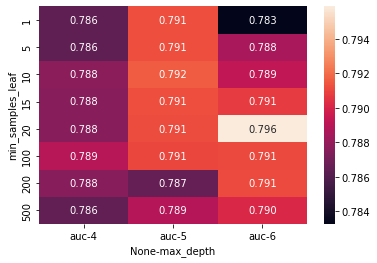

In [52]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

#### we choose max_depth = 6 and min_sample_leaf=20

### Final model Decision Tree

In [54]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=20)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=20)

## Random Forest 

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    y_pred = rf.predict_proba(X_val)[:, 1]
    y_threshold = y_pred >= 0.3
    f1 = f1_score(y_val,y_threshold)
    
    scores.append((n, auc, f1))

In [57]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc', 'f1'])
df_scores

,n_estimators,auc,f1
0,10,0.757520,0.558544
1,20,0.770851,0.587413
2,30,0.777527,0.588546
3,40,0.779505,0.591964
4,50,0.780585,0.595004
5,60,0.780918,0.597670
6,70,0.782706,0.601802
7,80,0.782227,0.603146
8,90,0.782783,0.602616
9,100,0.783927,0.600630


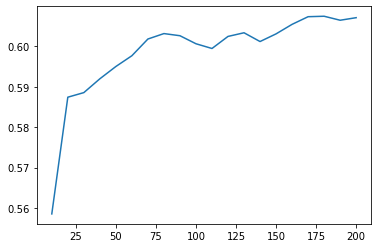

In [58]:
plt.plot(df_scores.n_estimators, df_scores.f1)

In [59]:
# n_estimators = 200

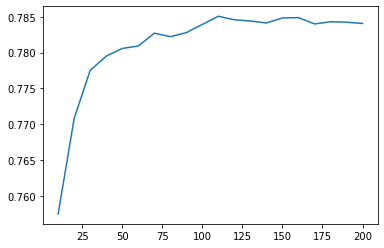

In [60]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [61]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [62]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

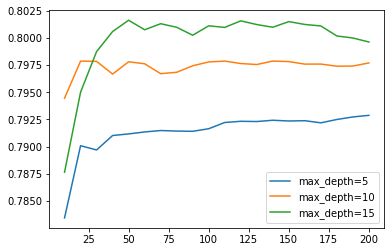

In [63]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

### We pick max_depth = 15

In [64]:
max_depth = 15

In [65]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [66]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

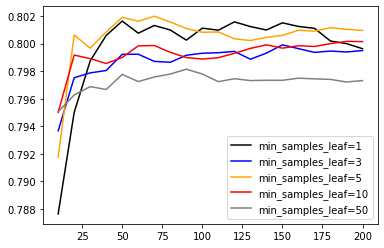

In [67]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

### We pick min_samples_leaf = 5

In [68]:
min_samples_leaf = 5

### Final model RandomForest 

In [69]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=15,
                            min_samples_leaf=5,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=5, n_estimators=200,
                       random_state=1)

## XGBoost

In [70]:
import xgboost as xgb

In [71]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [72]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

[12:23:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [73]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8019202655811197

In [74]:
y_pred = model.predict(dval)
for i in np.arange(0.0, 1.01, 0.1):
    y_threshold = y_pred >= i
    f1 = f1_score(y_val, y_threshold)
    roc = roc_auc_score(y_val, y_pred)
    print("i : %.3f, f1 : %.3f , roc : %.3f" % (i, f1, roc))

i : 0.000, f1 : 0.402 , roc : 0.802
i : 0.100, f1 : 0.499 , roc : 0.802
i : 0.200, f1 : 0.620 , roc : 0.802
i : 0.300, f1 : 0.639 , roc : 0.802
i : 0.400, f1 : 0.626 , roc : 0.802
i : 0.500, f1 : 0.586 , roc : 0.802
i : 0.600, f1 : 0.359 , roc : 0.802
i : 0.700, f1 : 0.057 , roc : 0.802
i : 0.800, f1 : 0.004 , roc : 0.802
i : 0.900, f1 : 0.000 , roc : 0.802
i : 1.000, f1 : 0.000 , roc : 0.802


### we can conclude that the best threshold is 0.3 from the code above

## XGBoost Parameter Tuning

In [78]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [79]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [80]:
scores = {}

In [81]:
%%capture output

xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [82]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.01'

In [83]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [84]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.1'

In [85]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [86]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.3'

In [87]:
scores.items()

dict_items([('eta=0.01',     num_iter  train_auc  val_auc
0          0    0.80786  0.79076
1          5    0.81325  0.79524
2         10    0.81359  0.79404
3         15    0.81428  0.79343
4         20    0.81552  0.79394
5         25    0.81722  0.79666
6         30    0.81941  0.79706
7         35    0.82077  0.79749
8         40    0.82138  0.79812
9         45    0.82195  0.79904
10        50    0.82268  0.79961
11        55    0.82523  0.80100
12        60    0.82571  0.79980
13        65    0.82748  0.79955
14        70    0.82831  0.79954
15        75    0.82887  0.79980
16        80    0.82969  0.80081
17        85    0.82996  0.80146
18        90    0.83046  0.80134
19        95    0.83070  0.80122
20       100    0.83137  0.80165
21       105    0.83179  0.80190
22       110    0.83247  0.80227
23       115    0.83341  0.80272
24       120    0.83419  0.80309
25       125    0.83468  0.80313
26       130    0.83535  0.80329
27       135    0.83592  0.80343
28       140    0.

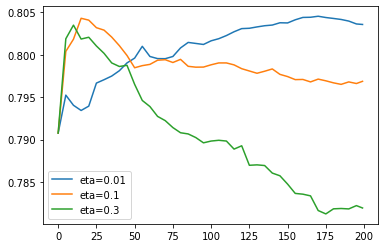

In [88]:
for eta, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
    
plt.legend()

### we pick eta=0.1

In [91]:
eta=0.1

In [92]:
scores = {}

In [93]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 2,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
    

In [94]:
%%capture output


xgb_params = {
    'eta': 0.1, 
    'max_depth': 4,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
    

In [95]:
%%capture output


xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)

In [96]:
scores

{'max_depth=2':     num_iter  train_auc  val_auc
 0          0    0.80786  0.79076
 1          5    0.83793  0.80189
 2         10    0.85479  0.80350
 3         15    0.86284  0.80186
 4         20    0.86848  0.80207
 5         25    0.87390  0.80104
 6         30    0.87999  0.80017
 7         35    0.88545  0.79904
 8         40    0.88984  0.79862
 9         45    0.89511  0.79876
 10        50    0.89965  0.79651
 11        55    0.90390  0.79461
 12        60    0.90785  0.79389
 13        65    0.91074  0.79273
 14        70    0.91459  0.79223
 15        75    0.91639  0.79141
 16        80    0.91810  0.79080
 17        85    0.92175  0.79066
 18        90    0.92336  0.79023
 19        95    0.92647  0.78961
 20       100    0.92957  0.78982
 21       105    0.93118  0.78991
 22       110    0.93377  0.78982
 23       115    0.93582  0.78887
 24       120    0.93715  0.78926
 25       125    0.94024  0.78696
 26       130    0.94388  0.78701
 27       135    0.94574  0.78693

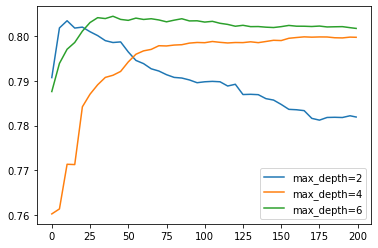

In [97]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)
    
plt.legend()

### we pick max_depth=6

In [98]:
max_depth=6

In [110]:
scores = {}

In [111]:
%%capture output


xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)

In [113]:
%%capture output


xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 20,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)

In [114]:
%%capture output


xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 30,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)

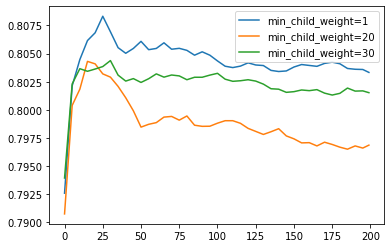

In [115]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)
    
plt.legend()

### we pick min_child_weight = 1

In [116]:
min_child_weight=1

### Final model for xgboost

In [118]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=30)

## Logistic Regression

In [119]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', C=1.0, random_state=1,max_iter=1000000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000000, random_state=1)

In [120]:
y_pred = model.predict_proba(X_val)[:, 1]

In [121]:
auc = roc_auc_score(y_val, y_pred)
auc

0.793408574560951

In [122]:
y_pred = model.predict_proba(X_val)[:, 1]
y_predict = (y_pred >= 0.3)
f1 = f1_score(y_val, y_predict)
f1

0.6316279069767441

## Selecting the final model 

### Decision Tree

In [123]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=20)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=20)

In [124]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc = roc_auc_score(y_val, y_pred)
print('roc decision tree: ', roc)

y_predict = y_pred >= 0.3
f1 = f1_score(y_val, y_predict)
print('f1 decision tree: ', f1)

roc decision tree:  0.7958884440578867
f1 decision tree:  0.6310360993905297


### Random Forest

In [125]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=15,
                            min_samples_leaf=5,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=5, n_estimators=200,
                       random_state=1)

In [126]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc = roc_auc_score(y_val, y_pred)
print('roc random forest: ', roc)

y_predict = y_pred >= 0.3
f1 = f1_score(y_val, y_predict)
print('f1 random fores: ', f1)

roc random forest:  0.800960929070629
f1 random fores:  0.6363222576240327


<AxesSubplot:>

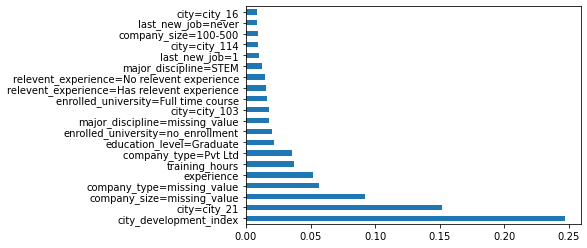

In [127]:
feat_importances = pd.Series(rf.feature_importances_, index=dv.get_feature_names())
feat_importances.nlargest(20).plot(kind='barh')

#### we can see from the chart above that city_development_index is the most important feature in random forest

### XGBoost

In [128]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=30)

In [129]:
y_pred = model.predict(dval)
roc = roc_auc_score(y_val, y_pred)
print('roc xgboost: ', roc)

y_predict = y_pred >= 0.3
f1 = f1_score(y_val, y_predict)
print('f1 xgboost: ', f1)

roc xgboost:  0.8034132907106329
f1 xgboost:  0.6411308709530323


<AxesSubplot:>

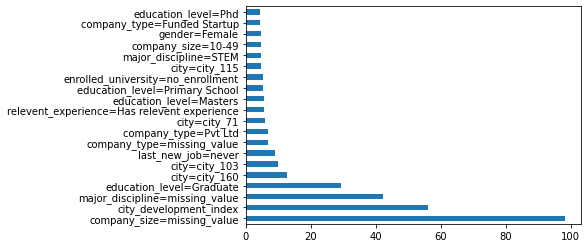

In [130]:
feat_importances_xgboost = pd.Series(model.get_score(importance_type='gain'), index=dv.get_feature_names())
feat_importances_xgboost.nlargest(20).plot(kind='barh')

#### we can see from the chart above that company_size=missing_value is the most important feature in XGBoost model

### Logistic Regression

In [132]:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=1,max_iter=1000000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000000, random_state=1)

In [133]:
y_pred = model.predict_proba(X_val)[:, 1]
roc = roc_auc_score(y_val, y_pred)
print('roc logistic regression: ', roc)

y_predict = y_pred >= 0.3
f1 = f1_score(y_val, y_predict)
print('f1 logistic regression: ', f1)

roc logistic regression:  0.793408574560951
f1 logistic regression:  0.6316279069767441


#### We choose XGBoost as our final model because it has the highest auc and f1 score

# Using The Final Model 

### we train our model on full_train data

In [134]:
y_full_train = df_full_train.target.values

del df_full_train['target']
del df_full_train['enrollee_id']

In [135]:
imputer = SimpleImputer(strategy='constant')
df_full_train_impute = imputer.fit_transform(df_full_train)
df_test_impute = imputer.transform(df_test)


df_full_train = pd.DataFrame(df_full_train_impute, columns = df_full_train.columns)
df_test = pd.DataFrame(df_test_impute, columns = df_full_train.columns)


In [136]:
dv = DictVectorizer(sparse=False)

full_train_dict = df_full_train.to_dict(orient='records')
X_full_train = dv.fit_transform(full_train_dict)

test_dict = df_test.to_dict(orient='records')
X_test = dv.transform(test_dict)

In [137]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                    feature_names=dv.get_feature_names())

dtest = xgb.DMatrix(X_test, feature_names=dv.get_feature_names())

In [138]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=30)

In [139]:
y_pred = model.predict(dtest)
roc = roc_auc_score(y_test, y_pred)
print('roc xgboost fulltrain: ', roc)

y_predict = y_pred >= 0.3
f1 = f1_score(y_test, y_predict)
print('f1 xgboost fulltrain: ', f1)

roc xgboost fulltrain:  0.8022665791768347
f1 xgboost fulltrain:  0.6322521699406122


<AxesSubplot:>

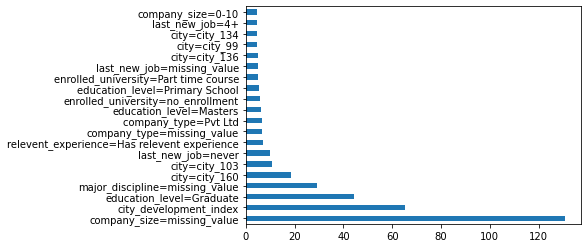

In [140]:
feat_importances_xgboost = pd.Series(model.get_score(importance_type='gain'), index=dv.get_feature_names())
feat_importances_xgboost.nlargest(20).plot(kind='barh')